## Experiments with weighted graphs

In [1]:
from __future__ import print_function

import qf.cc
import qf.graphs
import qf.morph
import qf.qastar
import qf.qzss
import qf.util

import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from mpl_toolkits.axes_grid1 import ImageGrid

In [24]:
G = qf.util.read_graph("../../Data/HumanBrain/DIRECTED.graph.txt")

In [25]:
cc=qf.cc.cardon_crochemore(G)

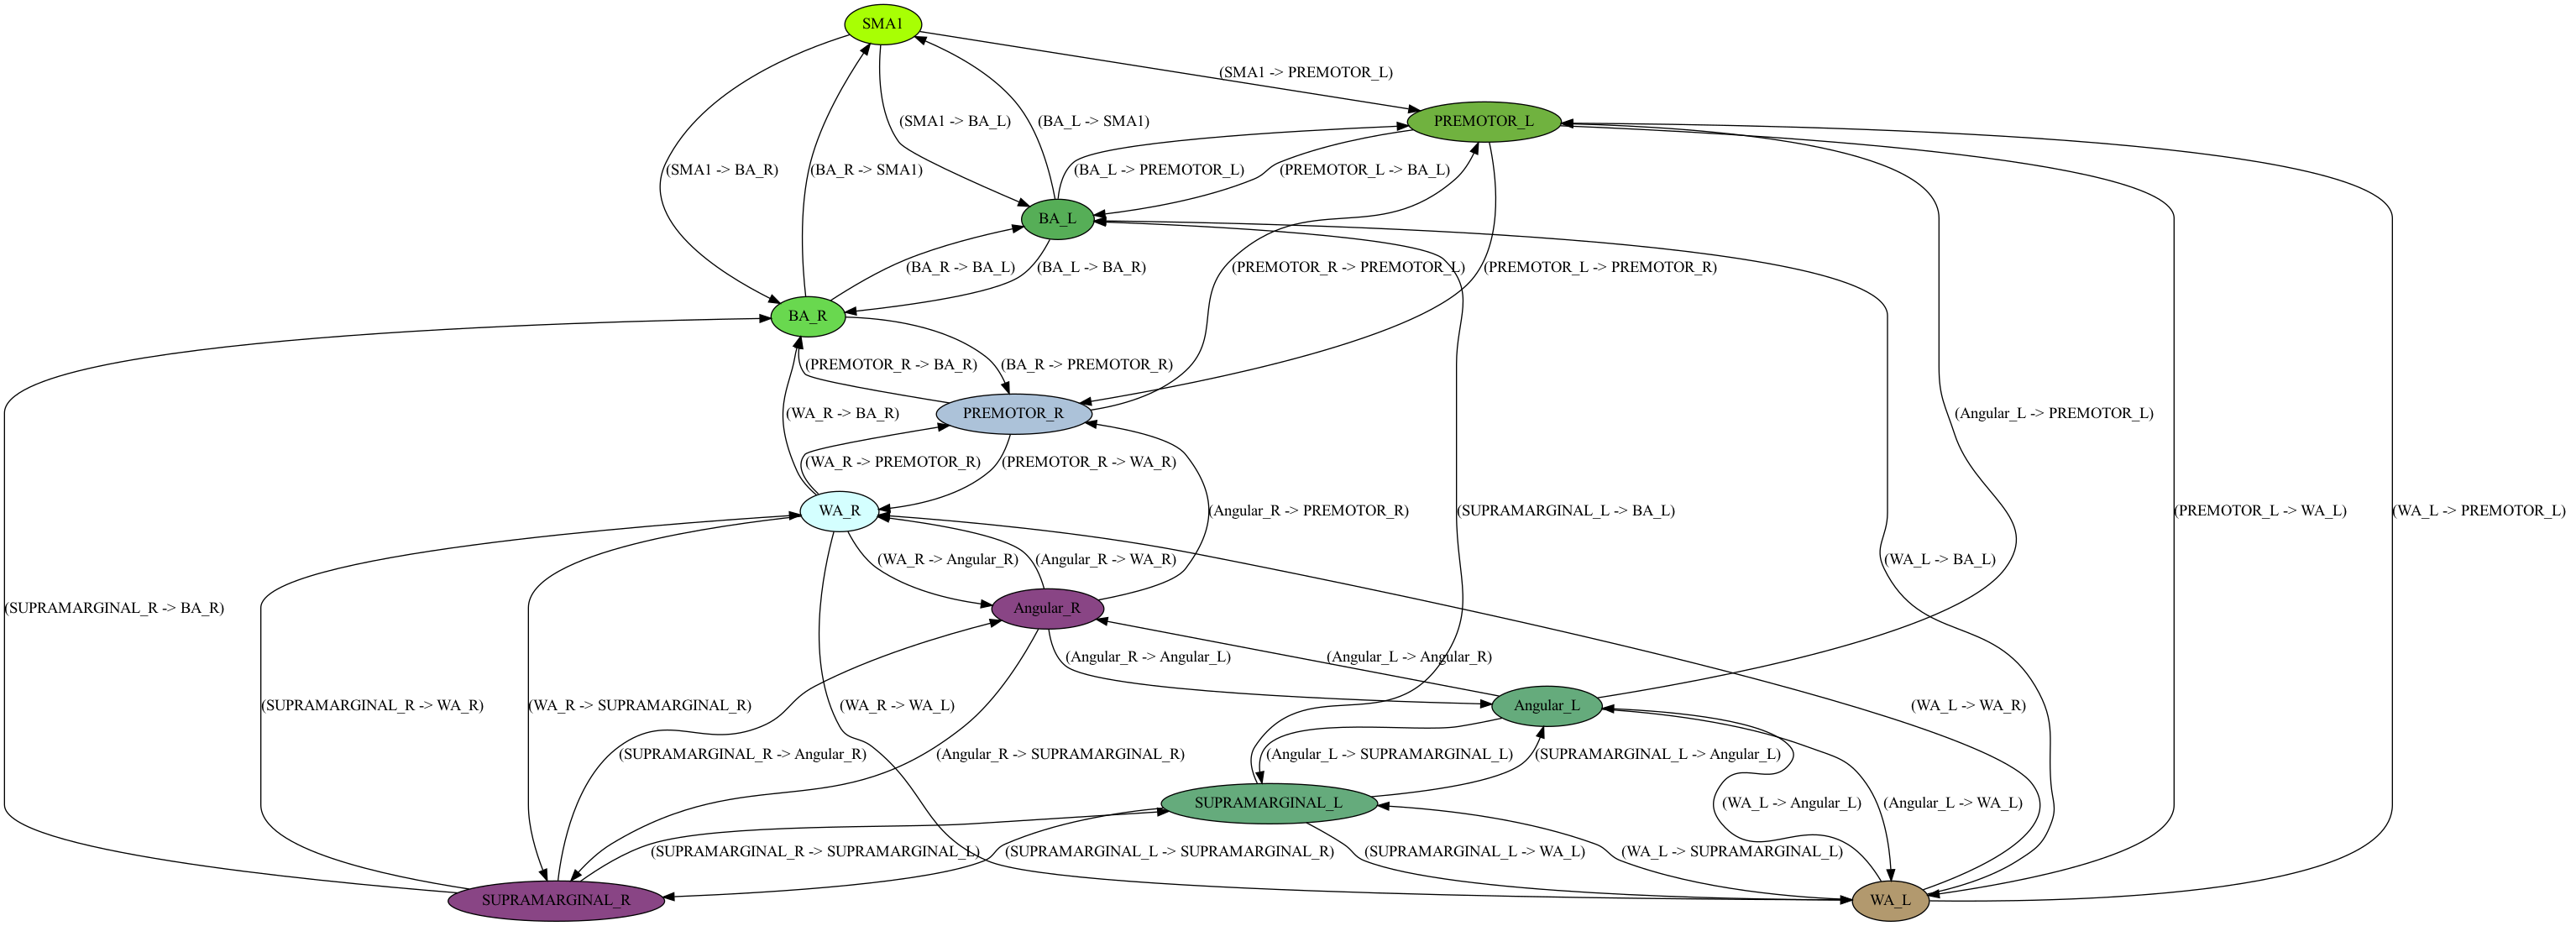

In [26]:
qf.graphs.visualize(G, cc, scale=1, timeout=0.1)

In [27]:
from fsmdot.nfa import Nfa

In [28]:
Q = set(G.nodes())|set(['S0'])

In [29]:
S = set([(c,i) for i in range(3) for c in cc.values()]) | set(Nfa.EPSILON)

In [30]:
d = {'S0': {Nfa.EPSILON: set([x for x in list(G.nodes()) if cc[x] == min(list(cc.values()))])}}
for x,y in G.edges():
    narcs = len([a for a in list(G.in_edges(y)) if cc[a[0]]==cc[x]])
    if x in d.keys():
        if (cc[x], narcs) in d[x].keys():
            d[x][(cc[x], narcs)]|= {y}
        else:
            d[x][(cc[x], narcs)]= {y}
    else:
        d[x]={(cc[x], narcs): {y}}

In [31]:
q0 = 'S0'

In [32]:
F = set([x for x in list(G.nodes()) if cc[x] == max(list(cc.values()))])

In [33]:
A = Nfa(Q, S, d, q0, F)

In [34]:
AG = A.dot_graph()
AG.write('/tmp/AG.dot')

In [35]:
AM = A.to_dfa()
AM.minimize()

In [36]:
AMG = AM.dot_graph()
AMG.write('/tmp/AMG.dot')